In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
# Kaggle dataset link - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
df = pd.read_csv(r"F:\CodeCave\Machine Learning\Datasets\Housing.csv")

In [19]:
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [20]:
print(df.isnull())

     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False            False    False     Fals

In [21]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [22]:
df = df.dropna()

In [23]:
df =  pd.get_dummies(df , drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [31]:
X = df.drop("price",axis=1)
Y = df['price']

In [32]:
X_train , X_test , Y_train, Y_test = train_test_split(
    X , Y , test_size=0.2 , random_state=42
)

In [33]:
model = LinearRegression()
model.fit(X_train , Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
Y_pred = model.predict(X_test)

In [35]:
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

In [36]:
print("MSE: ",mse)
print("R2 score: ",r2)

MSE:  1754318687330.6643
R2 score:  0.6529242642153184


C:\Users\Saniya\AppData\Local\Temp\ipykernel_2452\591155727.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


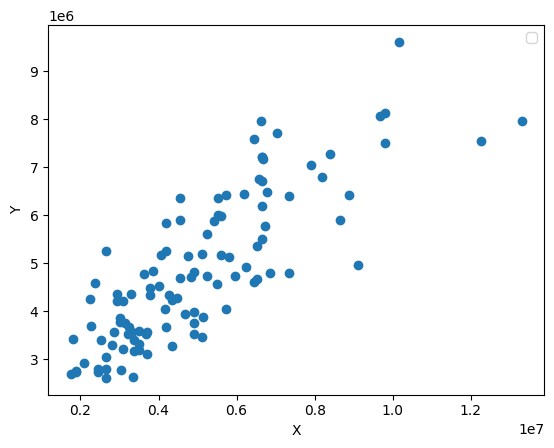

In [37]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()